In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import math
import datetime
    

In [216]:
phone1 = pd.read_json("mgm_a.json")
phone2 = pd.read_json("mgm_b.json")
phone1.index = pd.to_datetime(phone1['timestamp'])
phone2.index = pd.to_datetime(phone2['timestamp'])


In [217]:
t = []
for index,row in phone1.iterrows():
    t.append(math.sqrt(math.pow(row.x,2) + math.pow(row.y, 2) + math.pow(row.z,2)))
phone1['t'] = t

In [218]:
t = []
for index,row in phone2.iterrows():
    t.append(math.sqrt(math.pow(row.x,2) + math.pow(row.y, 2) + math.pow(row.z,2)))
phone2['t'] = t

In [219]:
dropThis = pd.date_range(datetime.datetime(2020, 3, 1, 10, 50, 22),datetime.datetime(2020, 5, 2, 10, 50, 22))
phone1[~phone1.index.isin(dropThis)]

dropThis = pd.date_range(datetime.datetime(2020, 5, 2, 11, 8, 20),datetime.datetime(2020, 5, 2, 11, 12, 0))
phone1[~phone1.index.isin(dropThis)]

dropThis = pd.date_range(datetime.datetime(2020, 5, 2, 11, 26, 35),datetime.datetime(2020, 5, 2, 16, 12, 0))
phone1[~phone1.index.isin(dropThis)]

,x,y,z,timestamp,t
timestamp,,,,,
2020-05-02 10:50:28.368,138.119995,84.779999,-25.680000,2020-05-02 10:50:28.368,164.086086
2020-05-02 10:51:18.417,142.080002,84.180000,-26.699999,2020-05-02 10:51:18.417,167.289836
2020-05-02 10:52:08.419,141.419998,83.939995,-26.340000,2020-05-02 10:52:08.419,166.551296
2020-05-02 10:52:58.419,141.839996,81.479996,-27.359999,2020-05-02 10:52:58.419,165.849763
2020-05-02 10:53:48.618,141.419998,81.900002,-27.299999,2020-05-02 10:53:48.618,165.688008
2020-05-02 10:54:38.621,143.639999,78.180000,-30.119999,2020-05-02 10:54:38.621,166.288232
2020-05-02 10:55:28.819,141.300003,79.500000,-28.740000,2020-05-02 10:55:28.819,164.657002
2020-05-02 10:56:18.919,141.779999,79.559998,-28.439999,2020-05-02 10:56:18.919,165.046038
2020-05-02 10:57:09.116,147.720001,114.000000,-15.839999,2020-05-02 10:57:09.116,187.264797


In [220]:
def get_distance(ts):    
    #if outside the test window, return None
    if ts < datetime.datetime(2020, 5, 2, 10, 54, 30):
        return 150
    if ts < datetime.datetime(2020, 5, 2, 10, 56, 25):
        return 126
    if ts < datetime.datetime(2020, 5, 2, 10, 58, 25):
        return 80
    if ts < datetime.datetime(2020, 5, 2, 11, 0, 24):
        return 51
    if ts < datetime.datetime(2020, 5, 2, 11, 2, 21):
        return 22
    if ts < datetime.datetime(2020, 5, 2, 11, 4, 22):        
        return 9
    if ts < datetime.datetime(2020, 5, 2, 11, 6, 28):
        return 0 
   
    if ts < datetime.datetime(2020, 5, 2, 11, 14, 0):
        return 138 + 182
    if ts < datetime.datetime(2020, 5, 2, 11, 17, 20):
        return 138 + 161
    if ts < datetime.datetime(2020, 5, 2, 11, 19, 0):
        return 138 + 126
    if ts < datetime.datetime(2020, 5, 2, 11, 21, 0):
        return 138 + 61
    if ts < datetime.datetime(2020, 5, 2, 11, 26, 35):
        return 138 + 61
      

_dcoll = []
for index,row in phone1.iterrows():
    _d = get_distance(row['timestamp'])
    _dcoll.append(_d)
phone1['d'] = _dcoll
phone1.dropna()
    
_dcoll = []
for index,row in phone2.iterrows():
    _d = get_distance(row['timestamp'])
    _dcoll.append(_d)

phone2['d'] = _dcoll
phone2.dropna()

,x,y,z,timestamp,t,d
timestamp,,,,,,
2020-05-02 09:48:55.548,40.058960,-15.680082,-32.017914,2020-05-02 09:48:55.548,53.625853,150.0
2020-05-02 09:49:45.839,40.069946,-15.633511,-31.241364,2020-05-02 09:49:45.839,53.160418,150.0
2020-05-02 09:50:36.124,40.217396,-14.890461,-31.447830,2020-05-02 09:50:36.124,53.180173,150.0
2020-05-02 09:51:26.409,40.292965,-14.936300,-32.688843,2020-05-02 09:51:26.409,53.992375,150.0
2020-05-02 09:52:16.698,39.426868,-15.191374,-31.197006,2020-05-02 09:52:16.698,52.521510,150.0
...,...,...,...,...,...,...
2020-05-02 11:22:52.345,-50.841827,-19.870958,22.317919,2020-05-02 11:22:52.345,58.973179,199.0
2020-05-02 11:23:42.662,-50.133560,-19.972473,22.712948,2020-05-02 11:23:42.662,58.550419,199.0
2020-05-02 11:24:32.976,-50.610855,-20.193321,22.208094,2020-05-02 11:24:32.976,58.842402,199.0


In [221]:
phone1 = phone1.dropna(subset=['d'])
phone2 = phone2.dropna(subset=['d'])
phone1 = phone1.drop(columns=['timestamp'])
phone2 = phone2.drop(columns=['timestamp'])

In [222]:
phone1['device'] = 1
phone2['device'] = 2

frames = [phone1, phone2]
result = pd.concat(frames)
result

,x,y,z,t,d,device
timestamp,,,,,,
2020-05-02 10:50:28.368,138.119995,84.779999,-25.680000,164.086086,150.0,1
2020-05-02 10:51:18.417,142.080002,84.180000,-26.699999,167.289836,150.0,1
2020-05-02 10:52:08.419,141.419998,83.939995,-26.340000,166.551296,150.0,1
2020-05-02 10:52:58.419,141.839996,81.479996,-27.359999,165.849763,150.0,1
2020-05-02 10:53:48.618,141.419998,81.900002,-27.299999,165.688008,150.0,1
...,...,...,...,...,...,...
2020-05-02 11:22:52.345,-50.841827,-19.870958,22.317919,58.973179,199.0,2
2020-05-02 11:23:42.662,-50.133560,-19.972473,22.712948,58.550419,199.0,2
2020-05-02 11:24:32.976,-50.610855,-20.193321,22.208094,58.842402,199.0,2


In [223]:
result.index = result['d']

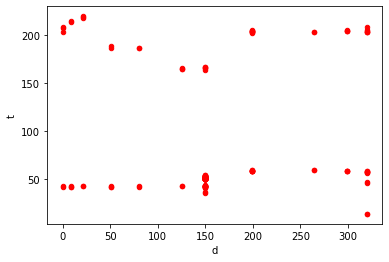

In [224]:
df.plot(kind='scatter',x='d',y='t',color='red')

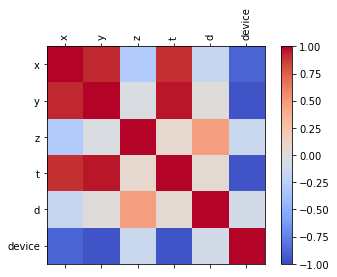

In [214]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

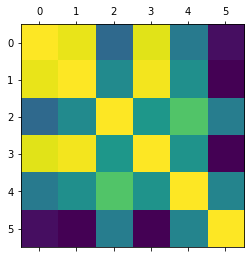

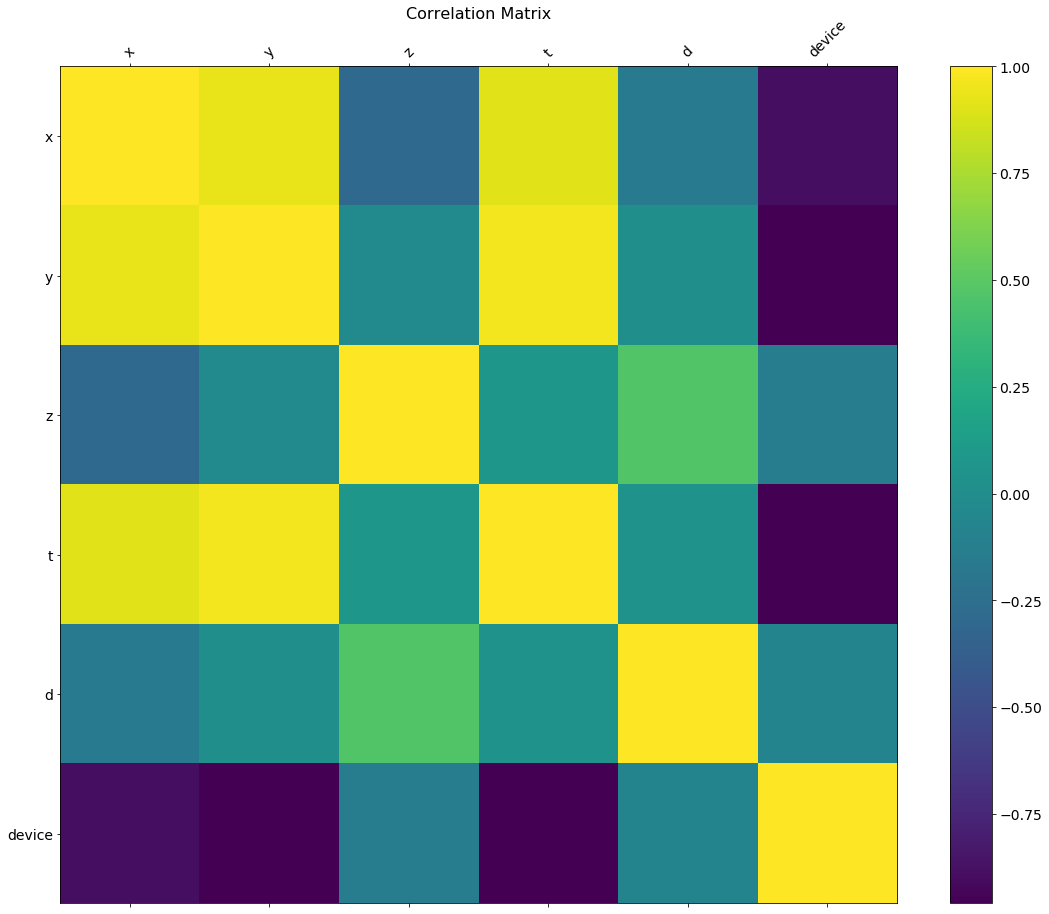

In [206]:
df = data
plt.matshow(df.corr())
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [201]:
data.corr()['d']
    

x        -0.152019
y         0.018100
z         0.469294
t         0.050525
d         1.000000
device   -0.075479
Name: d, dtype: float64

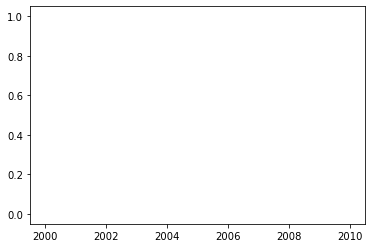

In [203]:
rolling_corr = data['t'].rolling(1500).corr(data['t'])
plt.plot(rolling_corr)
plt.show()



,x,y,z,t,d,device
timestamp,,,,,,
2020-05-02 10:50:28.368,138.119995,84.779999,-25.680000,164.086086,150.0,1
2020-05-02 10:51:18.417,142.080002,84.180000,-26.699999,167.289836,150.0,1
2020-05-02 10:52:08.419,141.419998,83.939995,-26.340000,166.551296,150.0,1
2020-05-02 10:52:58.419,141.839996,81.479996,-27.359999,165.849763,150.0,1
2020-05-02 10:53:48.618,141.419998,81.900002,-27.299999,165.688008,150.0,1
...,...,...,...,...,...,...
2020-05-02 10:50:55.331,25.343237,-4.104443,-33.167557,41.942972,150.0,2
2020-05-02 10:51:45.654,25.615973,-4.271944,-33.616371,42.479265,150.0,2
2020-05-02 10:52:35.975,25.861473,-3.744152,-32.707077,41.863915,150.0,2
